### Module to find pixel locations on mouse click 

In [13]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(20,30))

img=mpimg.imread('straight.jpg')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print("%.2f, %.2f" %(ix, iy))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

860.75, 1629.21
2133.96, 1685.79
1228.57, 2315.32
1716.63, 2294.10


In [14]:
%matplotlib tk
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig = plt.figure(figsize=(20,30))

img=mpimg.imread('tilt.jpg')

def onclick(event):
    ix, iy = event.xdata, event.ydata
    print("%.2f, %.2f" %(ix, iy))

cid = fig.canvas.mpl_connect('button_press_event', onclick)

imgplot = plt.imshow(img)
plt.show()

1306.37, 1572.62
2409.82, 2265.81
1320.52, 2308.25
1730.77, 2548.74


### Importing libraries

In [15]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import io
from skimage.color import rgb2gray
from scipy import signal
import math

### Inputing images in grescale

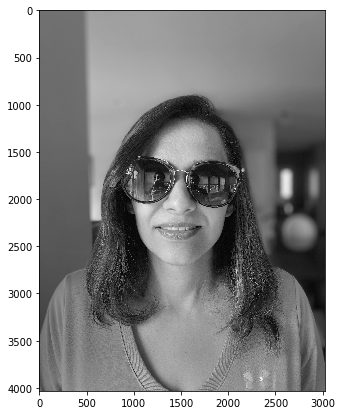

In [16]:
# Read the image and be sure it is grayscale'
im = io.imread('straight.jpg')
im = rgb2gray(im)

# Ensure the image is a float in the range [0-1]
straight = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) *1.0)).astype('float')

# Show the image
fig1 = plt.figure(figsize = (7,7))
plt.imshow(straight, cmap='gray')

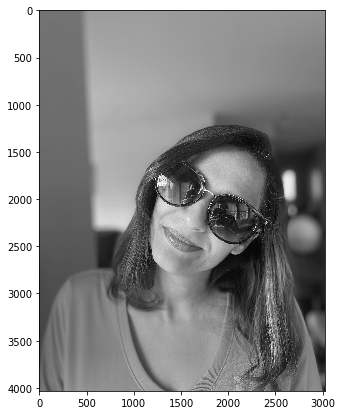

In [17]:
# Read the image and be sure it is grayscale'
im = io.imread('tilt.jpg')
im = rgb2gray(im)

# Ensure the image is a float in the range [0-1]
tilt = ((im - np.min(im)) * (1/(np.max(im) - np.min(im)) *1.0)).astype('float')

# Show the image
fig1 = plt.figure(figsize = (7,7))
plt.imshow(tilt, cmap='gray')

### Create p and q arrays based on pixel locations 

In [29]:
q = np.array([[1306.37],[1572.62],[2409.82],[2265.81],[1320.52],[2308.25],[1730.77],[2548.74]], np.float)
print(q)

[[1306.37]
 [1572.62]
 [2409.82]
 [2265.81]
 [1320.52]
 [2308.25]
 [1730.77]
 [2548.74]]


In [30]:
p = np.array([[860.75, 1629.21, 1.0, 0.0, 0.0, 0.0], \
              [0.0, 0.0, 0.0, 860.75, 1629.21, 1.0], \
              [2133.96, 1685.79, 1.0, 0.0, 0.0, 0.0], \
              [0.0, 0.0, 0.0, 2133.96, 1685.79, 1.0], \
              [1228.57, 2315.32, 1.0, 0.0, 0.0, 0.0], \
              [0.0, 0.0, 0.0, 1228.57, 2315.32, 1.0], \
              [1716.63, 2294.10, 1.0, 0.0, 0.0, 0.0], \
              [0.0, 0.0, 0.0, 1716.63, 2294.10, 1.0]], np.float)
print(p)

[[8.60750e+02 1.62921e+03 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 8.60750e+02 1.62921e+03 1.00000e+00]
 [2.13396e+03 1.68579e+03 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 2.13396e+03 1.68579e+03 1.00000e+00]
 [1.22857e+03 2.31532e+03 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.22857e+03 2.31532e+03 1.00000e+00]
 [1.71663e+03 2.29410e+03 1.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.71663e+03 2.29410e+03 1.00000e+00]]


### Solve overdetermined equation using least squares

In [31]:
A, res, rank, s = np.linalg.lstsq(p, q)
print(A)

[[ 8.79226222e-01]
 [-4.78553173e-01]
 [ 1.33430293e+03]
 [ 5.11072724e-01]
 [ 8.06015952e-01]
 [-1.81878728e+02]]


/Users/kshitijapatel/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  """Entry point for launching an IPython kernel.


### Create T and Tinv matrices based on solution from previous step

In [32]:
for row in A:
    for cell in row:
        print("%.2f" %cell)

0.88
-0.48
1334.30
0.51
0.81
-181.88


In [33]:
T = np.array([[0.88, -0.48, 1334.30],[0.51, 0.81, -181.88],[0.0, 0.0, 1.0]], np.float)
print(T)

[[ 8.8000e-01 -4.8000e-01  1.3343e+03]
 [ 5.1000e-01  8.1000e-01 -1.8188e+02]
 [ 0.0000e+00  0.0000e+00  1.0000e+00]]


In [37]:
Tinv = np.linalg.inv(T)
print(Tinv)

[[ 8.45864662e-01  5.01253133e-01 -1.03746930e+03]
 [-5.32581454e-01  9.18964077e-01  8.77764620e+02]
 [ 0.00000000e+00  0.00000000e+00  1.00000000e+00]]


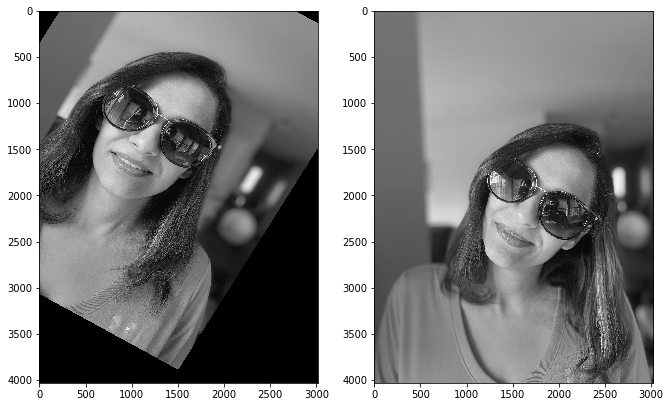

In [36]:
[rows, cols] = straight.shape

out_im1 = np.zeros((rows,cols))

for i in range(0, rows):
    for j in range(0, cols):
        
        cur_pt = np.array([i,j,1])
        transformed_pt = T.dot(cur_pt)
        
        transformed_pt = transformed_pt / transformed_pt[2]
        
        # Nearest neighbor interpolation
        new_i = int(round(transformed_pt[0]))
        new_j = int(round(transformed_pt[1]))
        
        if (new_i < 0 or new_i >= rows or new_j < 0 or new_j >= cols):
            continue
            
        out_im1[i,j] = straight[new_i, new_j]
        
# Show the image
plt.subplots(1,2,figsize=(11,11))
plt.subplot(1,2,1)
plt.imshow(out_im1, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(tilt, cmap='gray')

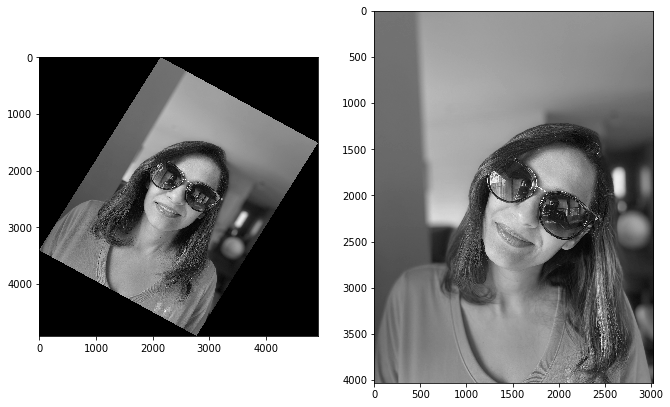

In [38]:
top_left = Tinv.dot(np.array([0.0, 0.0, 1.0], float))
top_left = top_left / top_left[2]

bottom_left = Tinv.dot(np.array([0.0, cols-1.0, 1.0], float))
bottom_left = bottom_left / bottom_left[2]

top_right = Tinv.dot(np.array([rows-1.0, 0.0, 1.0], float))
top_right = top_right / top_right[2]

bottom_right = Tinv.dot(np.array([rows-1.0, cols-1.0, 1.0], float))
bottom_right = bottom_right / bottom_right[2]

min_i = np.min([top_left[0], bottom_left[0], top_right[0], bottom_right[0]])
max_i = np.max([top_left[0], bottom_left[0], top_right[0], bottom_right[0]])

min_j = np.min([top_left[1], bottom_left[1], top_right[1], bottom_right[1]])
max_j = np.max([top_left[1], bottom_left[1], top_right[1], bottom_right[1]])

#print(rows, cols)
#print(min_i, max_i)
#print(min_j, max_j)

x_sampling = np.linspace(math.floor(min_i), math.ceil(max_i), math.ceil(max_i) - math.floor(min_i)+1)
y_sampling = np.linspace(math.floor(min_j), math.ceil(max_j), math.ceil(max_j) - math.floor(min_j)+1)

#print(x_sampling)
#print(y_sampling)

out_im2 = np.zeros((len(x_sampling), len(y_sampling)))

for i in range(0, len(x_sampling)):
    for j in range(0, len(y_sampling)):
        
        cur_pt = np.array([x_sampling[i],y_sampling[j],1.0], float)
        transformed_pt = T.dot(cur_pt)
        
        transformed_pt = transformed_pt / transformed_pt[2]
        
        # Nearest neighbour interpolation
        new_i = int(round(transformed_pt[0]))
        new_j = int(round(transformed_pt[1]))
        
        if (new_i < 0 or new_i >= rows or new_j < 0 or new_j >= cols):
            continue
            
        out_im2[i,j] = straight[new_i, new_j]
        
# Show the image
plt.subplots(1,2,figsize=(11,11))
plt.subplot(1,2,1)
plt.imshow(out_im2, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(tilt, cmap='gray')

# Transformation and interpolation

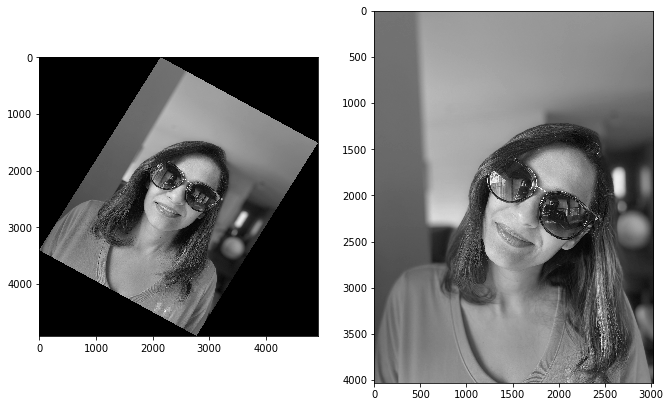

In [43]:
top_left = Tinv.dot(np.array([0.0, 0.0, 1.0], float))
top_left = top_left / top_left[2]

bottom_left = Tinv.dot(np.array([0.0, cols-1.0, 1.0], float))
bottom_left = bottom_left / bottom_left[2]

top_right = Tinv.dot(np.array([rows-1.0, 0.0, 1.0], float))
top_right = top_right / top_right[2]

bottom_right = Tinv.dot(np.array([rows-1.0, cols-1.0, 1.0], float))
bottom_right = bottom_right / bottom_right[2]

min_i = np.min([top_left[0], bottom_left[0], top_right[0], bottom_right[0]])
max_i = np.max([top_left[0], bottom_left[0], top_right[0], bottom_right[0]])

min_j = np.min([top_left[1], bottom_left[1], top_right[1], bottom_right[1]])
max_j = np.max([top_left[1], bottom_left[1], top_right[1], bottom_right[1]])

x_sampling = np.linspace(math.floor(min_i), math.ceil(max_i), math.ceil(max_i) - math.floor(min_i)+1)
y_sampling = np.linspace(math.floor(min_j), math.ceil(max_j), math.ceil(max_j) - math.floor(min_j)+1)

out_im2 = np.zeros((len(x_sampling), len(y_sampling)))

[rows, cols] = straight.shape

for i in range(0, len(x_sampling)):
    for j in range(0, len(y_sampling)):
        
        cur_pt = np.array([x_sampling[i],y_sampling[j],1.0], float)
        transformed_pt = T.dot(cur_pt)
        
        transformed_pt = transformed_pt / transformed_pt[2]
        
        # Bilinear interpolation 
        x = transformed_pt[0] 
        y = transformed_pt[1]
        
        xMax = int(math.ceil(x)) 
        xMin = int(math.floor(x)) 
        yMax = int(math.ceil(y)) 
        yMin = int(math.floor(y))
        xRatio = x - xMin 
        yRatio = y - yMin
        
        if (xMin < 0 or xMax >= rows or yMin < 0 or yMax >= cols):
            continue
        
        try: 
            x1 = straight[xMin, yMin]*(1 - xRatio) + straight[xMax, yMin]*xRatio 
            x2 = straight[xMin, yMax]*(1 - xRatio) + straight[xMax, yMax]*xRatio 
            y = x1*(1 - yRatio) + x2*yRatio
            out_im2[i, j] = y
            
        except: 
            pass        

        
# Show the image
plt.subplots(1,2,figsize=(11,11))
plt.subplot(1,2,1)
plt.imshow(out_im2, cmap='gray')
plt.subplot(1,2,2)
plt.imshow(tilt, cmap='gray')

In [2]:
import numpy as np
B = np.array([[2, 0],[0, 3]], np.float)
Binv = np.linalg.inv(B)
print(Binv)

[[0.5        0.        ]
 [0.         0.33333333]]


In [14]:
w = np.array([[0.5, 0],[0, 0.3]], np.float)
v = np.array([[3.5],[2.5]], np.float)
z = w.dot(v)
print(z)

[[1.75]
 [0.75]]
